In [ ]:
# Dataset Citation:
# Kaggle. (2023). Advertising Sales Dataset. Retrieved from 
# https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset
#This dataset contains advertising spending across different media (TV, radio, and newspaper) and the corresponding sales figures. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [139]:
#import data
data = pd.read_csv("Advertising Budget and Sales.csv")

In [140]:
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [142]:
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


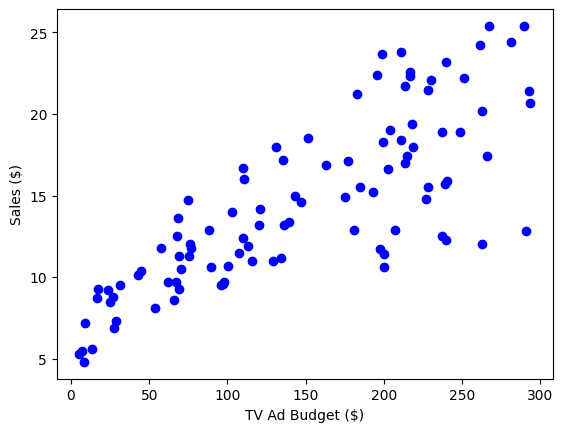

In [143]:
plt.scatter(data["TV Ad Budget ($)"][0:100], data["Sales ($)"][0:100],  color='blue')
plt.xlabel("TV Ad Budget ($)")
plt.ylabel("Sales ($)")
plt.show()

In [ ]:
# 1.Simple Linear Regression Models

In [144]:
#Sales ~ TV
X = data["TV Ad Budget ($)"].values.reshape(-1,1)
y = data["Sales ($)"].values.reshape(-1,1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [147]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [148]:
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation
print(f"Linear Regression Equation: Sales ($) = {slope[0]:.4f} * TV Ad Budget ($) + {intercept[0]:.4f}")

Linear Regression Equation: Sales ($) = 3.9157 * TV Ad Budget ($) + 14.1000


In [ ]:
predicted_sales = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predicted_sales)
print(f"Mean Squared Error (MSE) on Test Data: {mse:.2f}")

r2 = r2_score(y_test, predicted_sales)
print(f"R² Skoru: {r2:.4f}")

Mean Squared Error (MSE) on Test Data: 10.60
R² Skoru: 0.6640


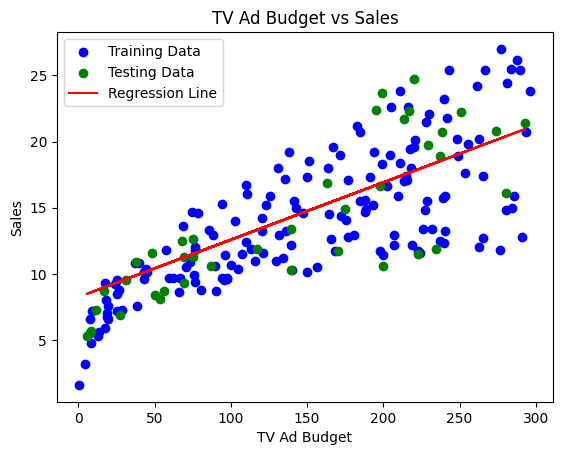

In [150]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, predicted_sales, color='red', label='Regression Line')
plt.xlabel('TV Ad Budget')
plt.ylabel('Sales')
plt.title('TV Ad Budget vs Sales')
plt.legend()
plt.show()

In [151]:
#Sales ~ Radio
X_radio = data["Radio Ad Budget ($)"].values.reshape(-1,1)
y_radio = data["Sales ($)"].values.reshape(-1,1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_radio, y_radio, test_size=0.2, random_state=42)

In [153]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [155]:
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation
print(f"Linear Regression Equation: Sales ($) = {slope[0]:.4f} * Radio Ad Budget ($) + {intercept[0]:.4f}")

Linear Regression Equation: Sales ($) = 3.0168 * Radio Ad Budget ($) + 14.1000


In [ ]:
predicted_sales = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predicted_sales)
print(f"Mean Squared Error (MSE) on Test Data: {mse:.2f}")

r2 = r2_score(y_test, predicted_sales)
print(f"R² Skoru: {r2:.4f}")

Mean Squared Error (MSE) on Test Data: 22.78
R² Skoru: 0.2783


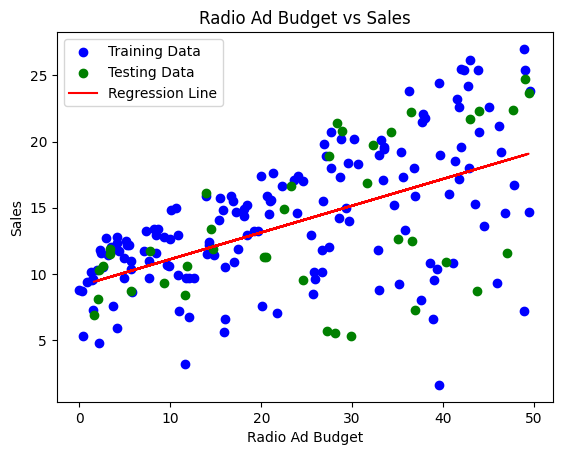

In [157]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, predicted_sales, color='red', label='Regression Line')
plt.xlabel('Radio Ad Budget')
plt.ylabel('Sales')
plt.title('Radio Ad Budget vs Sales')
plt.legend()
plt.show()

In [158]:
#Sales ~ Newspaper
X_newspaper = data["Newspaper Ad Budget ($)"].values.reshape(-1,1)
y_newspaper = data["Sales ($)"].values.reshape(-1,1)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_newspaper, y_newspaper, test_size=0.2, random_state=42)

In [160]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [162]:
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation
print(f"Linear Regression Equation: Sales ($) = {slope[0]:.4f} * Newspaper Ad Budget ($) + {intercept[0]:.4f}") 

Linear Regression Equation: Sales ($) = 1.2114 * Newspaper Ad Budget ($) + 14.1000


In [ ]:
predicted_sales = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predicted_sales)
print(f"Mean Squared Error (MSE) on Test Data: {mse:.2f}")

r2 = r2_score(y_test, predicted_sales)
print(f"R² Skoru: {r2:.4f}")

Mean Squared Error (MSE) on Test Data: 30.29
R² Skoru: 0.0404


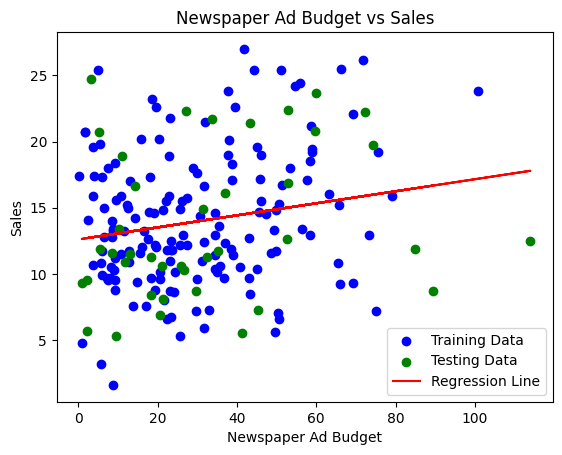

In [164]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, predicted_sales, color='red', label='Regression Line')
plt.xlabel('Newspaper Ad Budget')
plt.ylabel('Sales')
plt.title('Newspaper Ad Budget vs Sales')
plt.legend()
plt.show()

In [ ]:
#Multiple Linear Regression

In [165]:
#TV Ad Budget ($), Radio Ad Budget ($), Newspaper Ad Budget ($) vs Sales ($)
X = data[["TV Ad Budget ($)","Radio Ad Budget ($)","Newspaper Ad Budget ($)"]].values
y = data["Sales ($)"].values

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LinearRegression()
model.fit (X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 3.588163345396855
R2 Score: 0.8863195562008254


In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (weights for each feature):")
print(f"TV Ad Budget: {coefficients[0]}")
print(f"Radio Ad Budget: {coefficients[1]}")
print(f"Newspaper Ad Budget: {coefficients[2]}")

print(f"Intercept (bias term): {intercept}")

Coefficients (weights for each feature):
TV Ad Budget: 3.7641961751469952
Radio Ad Budget: 2.792306650198436
Newspaper Ad Budget: 0.05597551446265259
Intercept (bias term): 14.1


In [171]:
correlation_matrix = data[["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"]].corr()
print(correlation_matrix)

                         TV Ad Budget ($)  Radio Ad Budget ($)  \
TV Ad Budget ($)                 1.000000             0.054809   
Radio Ad Budget ($)              0.054809             1.000000   
Newspaper Ad Budget ($)          0.056648             0.354104   

                         Newspaper Ad Budget ($)  
TV Ad Budget ($)                        0.056648  
Radio Ad Budget ($)                     0.354104  
Newspaper Ad Budget ($)                 1.000000  


In [174]:
x_df = pd.DataFrame(X)
X_with_const = add_constant(x_df)

vif_data = pd.DataFrame()
vif_data["Ad Budget Type"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

  Ad Budget Type       VIF
0          const  6.848900
1              0  1.004611
2              1  1.144952
3              2  1.145187
